In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
import seaborn as sn

In [19]:
df=pd.read_csv(r"datatab.csv")
df.head()

,Purchasing behaviour,Gender,Age,Time spent in online shop
0,Buy now,female,22,40
1,Buy now,female,25,23
2,Buy now,male,18,12
3,Buy now,male,45,28
4,Buy now,female,12,43


In [20]:
df.isnull().sum()

Purchasing behaviour         0
Gender                       0
Age                          0
Time spent in online shop    0
dtype: int64

In [21]:
df['Purchasing behaviour'] = df['Purchasing behaviour'].map({"Don't buy anything": 0, "Buy now": 1,"Buy later":2})
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})
df.shape
df.head()

,Purchasing behaviour,Gender,Age,Time spent in online shop
0,1,1,22,40
1,1,1,25,23
2,1,0,18,12
3,1,0,45,28
4,1,1,12,43


In [22]:
x=df[["Gender","Age","Time spent in online shop"]]
y=df["Purchasing behaviour"]

In [23]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,
    test_size=0.2,random_state=42)
display(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(19, 3)

(5, 3)

(19,)

(5,)

In [24]:
model=LogisticRegression(solver='newton-cg',max_iter=1000)

In [25]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [26]:
conf_mat=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",conf_mat)
Accuracy_Score=metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score: ",Accuracy_Score)
print("ACcuracy in %: ", Accuracy_Score*100, "%")

Confusion Matrix:  [[1 1 0]
 [0 1 0]
 [0 2 0]]
Accuracy Score:  0.4
ACcuracy in %:  40.0 %


<Axes: xlabel='Predicted', ylabel='Actual'>

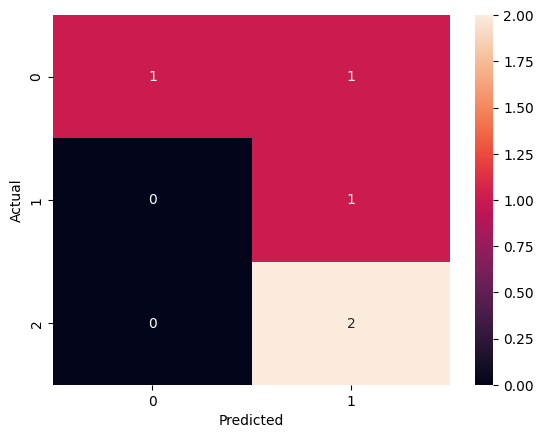

In [27]:
conf_mat=pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])
sn.heatmap(conf_mat,annot=True)